In [4]:
pip install lightkurve

    100% |████████████████████████████████| 2.1MB 480kB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 2.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f3/76/4697ce203a3d42b2ead61127b35e5fcc26bba9a35c03b32a2bd342a4c869/tqdm-4.46.1-py2.py3-none-any.whl
  Found existing installation: tqdm 4.15.0
    Uninstalling tqdm-4.15.0:
      Successfully uninstalled tqdm-4.15.0
You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install batman-package

You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import lightkurve as lk
import batman
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#stellar radius calc
r_planet = 12.520 #earth radii
r_earth = 6378 #km
r_sun = 69640 #km

print((r_planet * r_earth) / r_sun)


sem_axis = .04269 #AU
AU = 1.496e8
print((sem_axis * AU) / r_sun)

1.1466479035037334
91.7062607696726


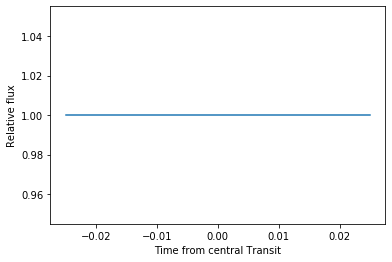

In [5]:
flux = m.light_curve(params)

plt.plot(t, flux)
plt.xlabel("Time from central Transit")
plt.ylabel("Relative flux")
plt.show()

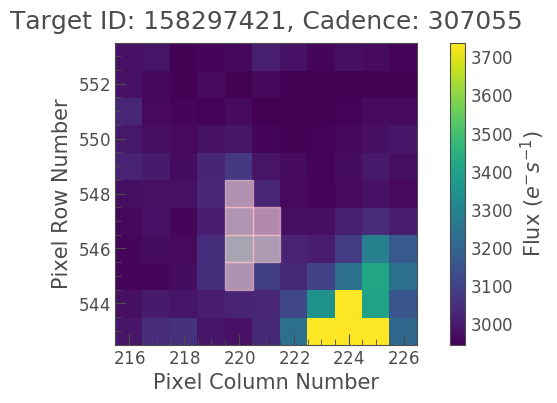

In [10]:
search = lk.search_targetpixelfile('TIC 158297421', mission='TESS', sector=13)
tpf = search.download(quality_bitmask = 'default')
mask = tpf.create_threshold_mask(threshold=2)
tpf.plot(aperture_mask = mask)

(1657, 1680)

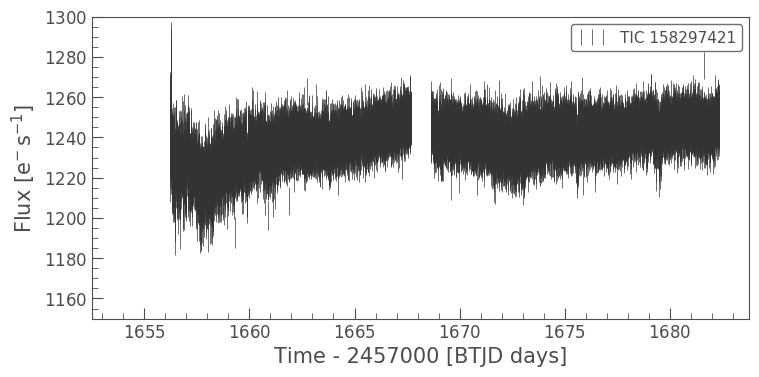

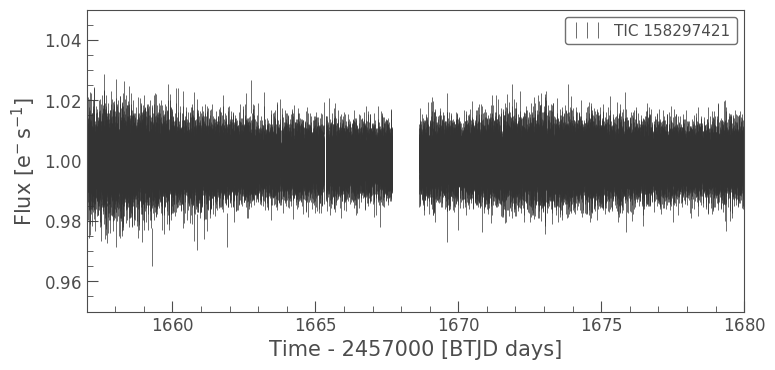

In [21]:
lc = tpf.to_lightcurve(aperture_mask = mask)
lc.errorbar()
plt.ylim(1150, 1300)

flat = lc.flatten()
flat.errorbar()
plt.ylim(.95, 1.05)
plt.xlim(1657, 1680)

(1657, 1680)

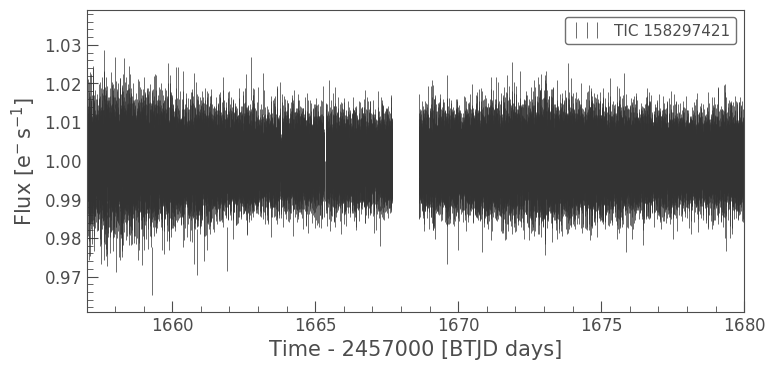

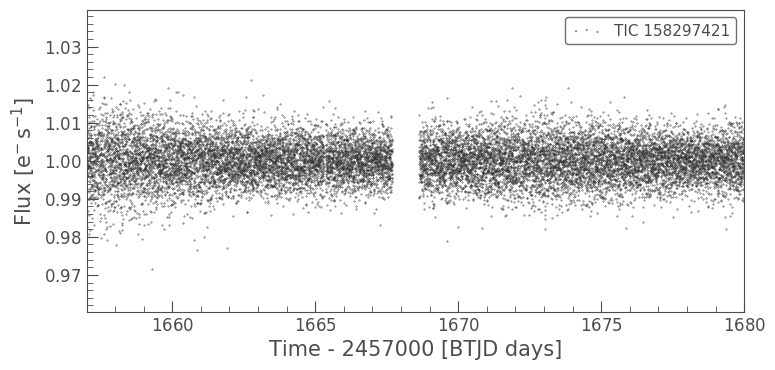

In [24]:
clean = flat.remove_outliers(sigma = 6)
clean.errorbar()
plt.xlim(1657, 1680)

clean.scatter(s = .1)
plt.xlim(1657, 1680)

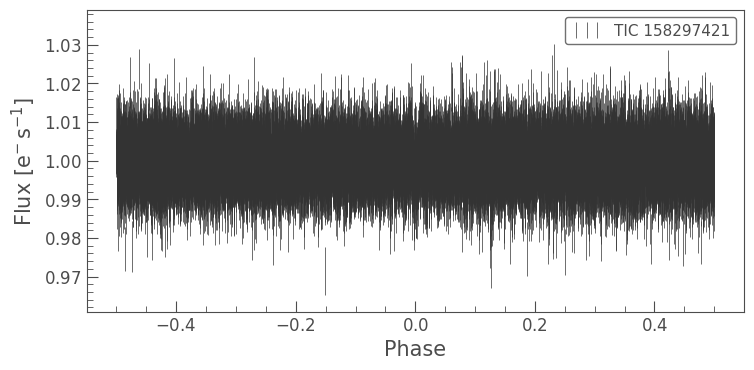

In [27]:
p = 3.9228038
t0 = 1659.885

fold = clean.fold(period = 3.9228038, t0 = 1659.885)
fold.errorbar()

#i think i'm missing something here, because the dip isn't obvious

In [29]:
#parameters from exofop
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 3.923                #orbital period
params.rp = 1.146                       #planet radius (in units of stellar radii)
params.a = 91.706                        #semi-major axis (in units of stellar radii)
params.inc = 87.08                      #orbital inclination (in degrees)
params.ecc = 0.088                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients

t = np.linspace(-0.025, 0.025, 100)  #times at which to calculate light curve
m = batman.TransitModel(params,fold.time)    #initializes mode

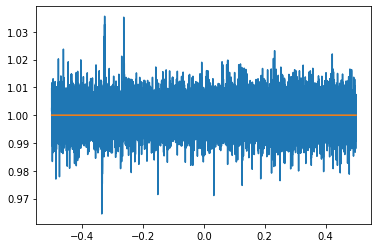

In [31]:
flux = m.light_curve(params)

plt.plot(fold.time, fold.flux)
plt.plot(fold.time, flux)